# Salary Predictions Based on Job Descriptions

# Part 1 - DEFINE

### ---- 1 Define the problem ----

Write the problem in your own words here

We want to predict the salary of a professional based on the data we are given. The data gives us information of the individual's jobID, companyID, the type of job, degree, major, industry (ALL categorical features) and years of experience and miles from Metropolis (numerical features).

In [43]:
#import your libraries
import pandas as pd
import sklearn as sk
import numpy as np
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn import ensemble
from sklearn.ensemble import AdaBoostRegressor
#etc

#your info here
__author__ = "Thu Nguyen"
__email__ = "thumn6@uci.edu"

## Part 2 - DISCOVER

### ---- 2 Load the data ----

In [2]:
#load the data into a Pandas dataframe
train_features = pd.read_csv("./data/train_features.csv")
train_salaries = pd.read_csv("./data/train_salaries.csv")
print(train_features.shape)
train_features.head()


(1000000, 8)


,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [3]:
train_salaries.head()

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


### ---- 3 Clean the data ----

In [4]:
#look for duplicate data, invalid data (e.g. salaries <=0), or corrupt data and remove it
# Making a list of missing value types

missing_values = ["n/a", "na", "--"]
train_features = pd.read_csv("./data/train_features.csv", na_values=missing_values);
train_salaries = pd.read_csv("./data/train_salaries.csv", na_values=missing_values);


In [5]:
# Summary of any missing values
print (train_features.isnull().sum())
# Check to see if there is any missing values
print (train_features.isnull().values.any())
# Total number of missing values
print (train_features.isnull().sum().sum())

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
dtype: int64
False
0


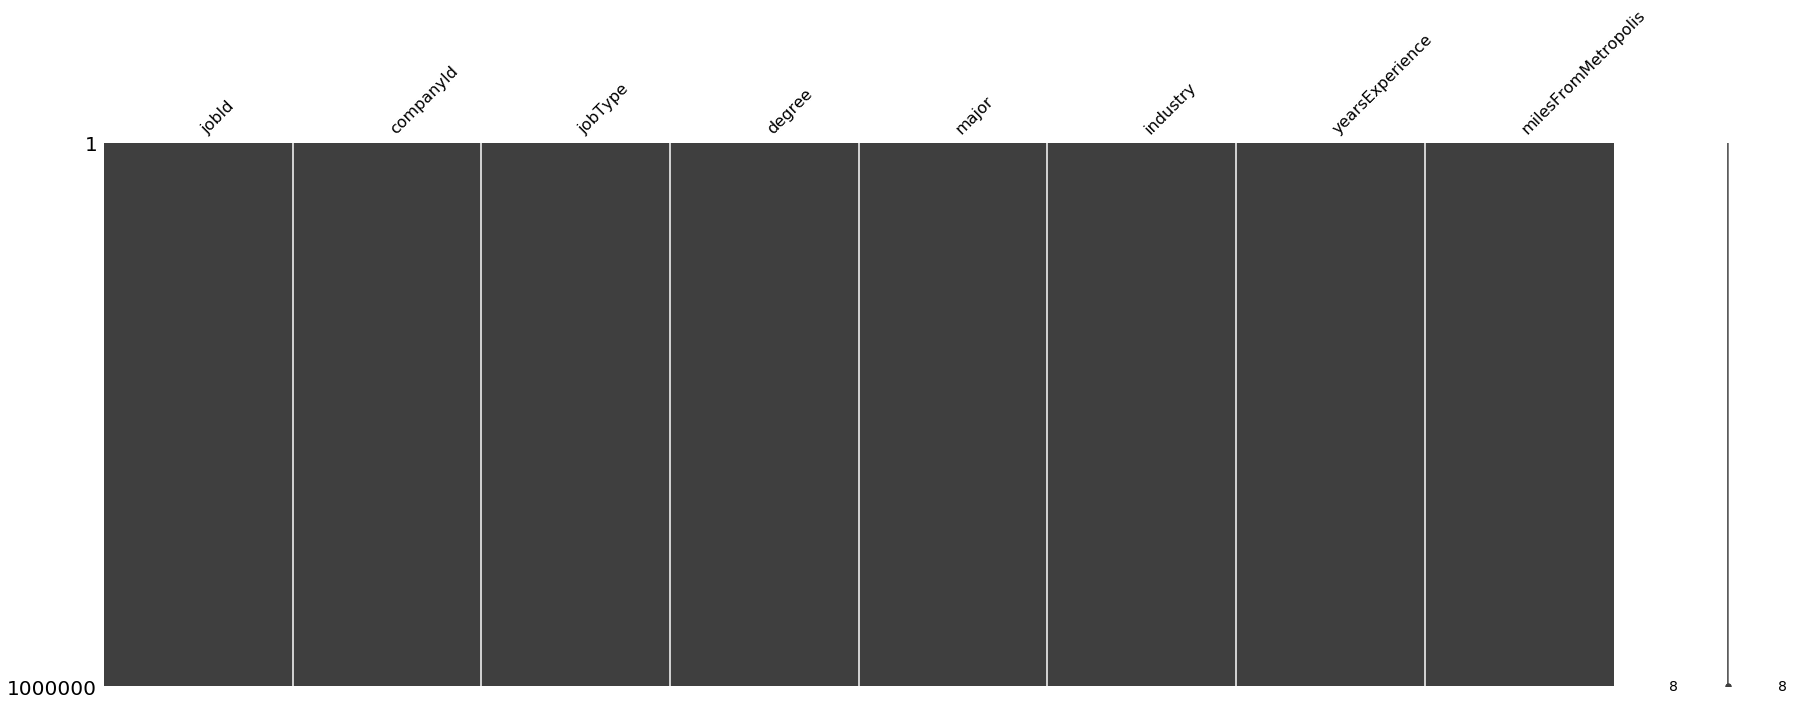

In [6]:
import missingno as msno
msno.matrix(train_features, figsize=(30,10))

### ---- 4 Explore the data (EDA) ----

In [7]:
#summarize each feature variable
print(pd.DataFrame.describe(train_features['yearsExperience']))
print(pd.DataFrame.describe(train_features['milesFromMetropolis']))
#summarize the target variable
print(pd.DataFrame.describe(train_salaries['salary']))
#look for correlation between each feature and the target

#look for correlation between features

count    1000000.000000
mean          11.992386
std            7.212391
min            0.000000
25%            6.000000
50%           12.000000
75%           18.000000
max           24.000000
Name: yearsExperience, dtype: float64
count    1000000.000000
mean          49.529260
std           28.877733
min            0.000000
25%           25.000000
50%           50.000000
75%           75.000000
max           99.000000
Name: milesFromMetropolis, dtype: float64
count    1000000.000000
mean         116.061818
std           38.717936
min            0.000000
25%           88.000000
50%          114.000000
75%          141.000000
max          301.000000
Name: salary, dtype: float64


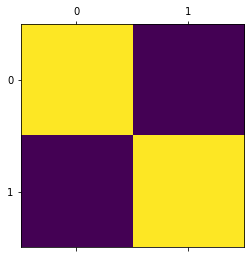

In [8]:
plt.matshow(train_features.corr())
plt.show()

### Look for outliers

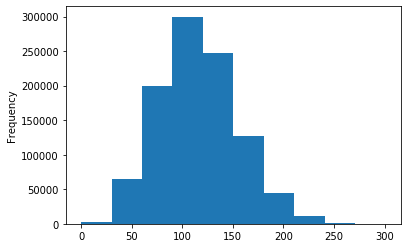

In [9]:

train_salaries.salary.plot.hist()


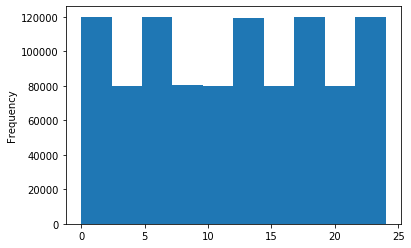

In [10]:
train_features.yearsExperience.plot.hist()

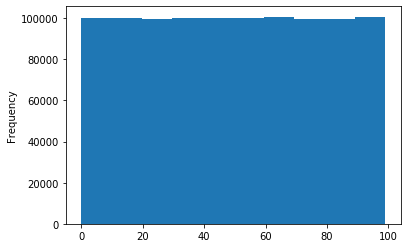

In [11]:
train_features.milesFromMetropolis.plot.hist()

### ---- 5 Establish a baseline ----

In [12]:
#select a reasonable metric (MSE in this case)
from sklearn.metrics import mean_squared_error
#create an extremely simple model and measure its efficacy
from sklearn.linear_model import LinearRegression

def baselineModel(train_features, train_salaries):
    
    industry_salary = pd.merge(train_features,train_salaries);
    industry_vs_salary = industry_salary.groupby(['industry']).mean();
    return industry_vs_salary;


#e.g. use "average salary" for each industry as your model and then measure MSE


#during 5-fold cross-validation
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(train_features, train_salaries, test_size=0.4, random_state=0)
industry_vs_salary = baselineModel(X_train, y_train);

In [13]:
X_train.shape, y_train.shape

((600000, 8), (600000, 2))

In [14]:
X_test.shape, y_test.shape

((400000, 8), (400000, 2))

In [15]:
predicted_salary = pd.merge(X_test, industry_vs_salary, on ='industry')
print(predicted_salary)
#print(industry_vs_salary)

                   jobId companyId         jobType       degree        major  \
0       JOB1362684564792     COMP1         MANAGER    BACHELORS         NONE   
1       JOB1362685363102    COMP47          JUNIOR    BACHELORS      PHYSICS   
2       JOB1362684742345    COMP16             CTO    BACHELORS    CHEMISTRY   
3       JOB1362684537977     COMP0          JUNIOR  HIGH_SCHOOL         NONE   
4       JOB1362684499426     COMP2          JUNIOR         NONE         NONE   
5       JOB1362684982679    COMP14             CFO    BACHELORS    CHEMISTRY   
6       JOB1362685113133    COMP52             CTO      MASTERS  ENGINEERING   
7       JOB1362684724050    COMP35         MANAGER     DOCTORAL         NONE   
8       JOB1362684685551    COMP15             CTO    BACHELORS      BIOLOGY   
9       JOB1362684995750    COMP51  VICE_PRESIDENT         NONE         NONE   
10      JOB1362684994651    COMP36         MANAGER     DOCTORAL    CHEMISTRY   
11      JOB1362684637082    COMP30      

In [16]:
from sklearn.metrics import mean_squared_error
baseline_mse = mean_squared_error(y_test['salary'], predicted_salary['salary'])
print(baseline_mse)

1628.423195165752


### ---- 6 Hypothesize solution ----

#### Drop columns that might be irrelevant to salaries, like jobID and companyID

In [17]:
train_features = train_features.drop(columns=['jobId', 'companyId'])

In [18]:
train_features.shape

(1000000, 6)

#### Convert the categorical features into numerical

In [19]:
cat_features = ['jobType', 'degree', 'major', 'industry'];
for cat in cat_features:
    train_features[cat] = preprocessing.LabelEncoder().fit_transform(train_features[cat])


train_feature, test_feature, train_salary, test_salary = train_test_split(train_features, train_salaries, test_size=0.4, random_state=0)
#train_features.head(10)
#train_features['major'].apply(preprocessing.LabelEncoder().fit_transform)

### Linear Regression

In [20]:
#brainstorm 3 models that you think may improve results over the baseline model based
#on your 
linearL = linear_model.LinearRegression()
linearL.fit(train_feature, train_salary['salary'])
pred_salary = linearL.predict(test_feature);
print(mean_squared_error(test_salary['salary'], pred_salary))

924.5124685515124


### Decision Tree

In [21]:
dtree = DecisionTreeRegressor(random_state=0)
dtree.fit(train_feature, train_salary['salary']);
print(mean_squared_error(test_salary['salary'], dtree.predict(test_feature)))

711.8241282975824


### Random Forest

In [37]:
random_forest = RandomForestRegressor(max_depth=6, random_state=0)
random_forest.fit(train_feature, train_salary['salary'])
print(mean_squared_error(test_salary['salary'], random_forest.predict(test_feature)))

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


587.7397842398915


In [41]:
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(train_feature, train_salary['salary'])
mse = mean_squared_error(test_salary['salary'], clf.predict(test_feature))
print("MSE: %.4f" % mse)

MSE: 414.3443


In [44]:
regr = AdaBoostRegressor(random_state=0, n_estimators=100)
regr.fit(train_feature, train_salary['salary'])
mse_regr = mean_squared_error(test_salary['salary'], regr.predict(test_feature))
print("MSE: %.4f" % mse)

MSE: 414.3443


Brainstorm 3 models that you think may improve results over the baseline model based on your EDA and explain why they're reasonable solutions here.

Also write down any new features that you think you should try adding to the model based on your EDA, e.g. interaction variables, summary statistics for each group, etc

## Part 3 - DEVELOP

You will cycle through creating features, tuning models, and training/validing models (steps 7-9) until you've reached your efficacy goal

#### Your metric will be MSE and your goal is:
 - <360 for entry-level data science roles
 - <320 for senior data science roles

### ---- 7 Engineer features  ----

In [22]:
#make sure that data is ready for modeling
#create any new features needed to potentially enhance model

### ---- 8 Create models ----

In [23]:
#create and tune the models that you brainstormed during part 2

### ---- 9 Test models ----

In [24]:
#do 5-fold cross validation on models and measure MSE

### ---- 10 Select best model  ----

In [25]:
#select the model with the lowest error as your "prodcuction" model

## Part 4 - DEPLOY

### ---- 11 Automate pipeline ----

In [26]:
#write script that trains model on entire training set, saves model to disk,
#and scores the "test" dataset

### ---- 12 Deploy solution ----

In [27]:
#save your prediction to a csv file or optionally save them as a table in a SQL database
#additionally, you want to save a visualization and summary of your prediction and feature importances
#these visualizations and summaries will be extremely useful to business stakeholders

### ---- 13 Measure efficacy ----

We'll skip this step since we don't have the outcomes for the test data